In [63]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import numpy as np
%matplotlib inline
plt.style.use('Solarize_Light2')

In [64]:
# r = requests.get('https://datamarket.com/api/v1/list.json?ds=22qx')
# jobj = json.loads(r.text[18:-1])
# data = jobj[0]['data']
data = pd.read_csv('../zecon/State_time_series.csv',parse_dates=['Date'])

In [66]:
data.tail()#data.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
13207,2017-12-31,Virginia,NaN,39599.0,36664.0,242.105263,146.157362,143.816452,147.329650,153.763978,...,133500.0,291300.0,246200.0,237300.0,492700.0,1538.0,1500.0,0.948,1738.0,1441.0
13208,2017-12-31,Washington,NaN,17918.0,15109.0,304.291151,220.017256,195.881979,188.990826,201.271186,...,208200.0,337600.0,351300.0,352800.0,662700.0,1842.0,1803.0,1.132,1690.0,1828.0
13209,2017-12-31,WestVirginia,NaN,9800.0,9422.0,119.723429,77.764277,89.272003,93.071172,88.122881,...,63800.0,115100.0,103500.0,103300.0,174300.0,858.0,858.0,0.674,846.0,858.0
13210,2017-12-31,Wisconsin,NaN,27273.0,23370.0,145.664583,129.727412,127.136334,116.753927,95.573529,...,107200.0,158700.0,169300.0,170200.0,280600.0,1179.0,1153.0,0.920,1068.0,1163.0
13211,2017-12-31,Wyoming,NaN,4337.0,3992.0,172.943376,148.544590,137.093704,147.855347,153.846154,...,140400.0,195600.0,200200.0,200500.0,315900.0,1144.0,1115.0,0.902,1023.0,1120.0


In [67]:
data_st=data.loc[data['RegionName']=='Washington']

In [68]:
data_st.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
41,1996-04-30,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88300.0,112900.0,134400.0,136900.0,210100.0,NaN,NaN,NaN,NaN,NaN
87,1996-05-31,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88400.0,113300.0,134800.0,137100.0,209800.0,NaN,NaN,NaN,NaN,NaN
133,1996-06-30,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88500.0,113600.0,135100.0,137400.0,209800.0,NaN,NaN,NaN,NaN,NaN
179,1996-07-31,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88400.0,113800.0,135100.0,137600.0,209900.0,NaN,NaN,NaN,NaN,NaN
225,1996-08-31,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88400.0,114000.0,135200.0,137700.0,210200.0,NaN,NaN,NaN,NaN,NaN


In [69]:
data_st2=data_st[(data_st['Date'] > '2011-06-01') & (data_st['Date'] < '2020-02-01')]

In [70]:
data_st2.head()#count()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
9153,2011-06-30,Washington,103.25,48192.0,49876.0,202.488688,141.379310,127.334620,128.678261,126.056341,...,141400.0,187700.0,224700.0,228800.0,392300.0,1387.0,1372.0,0.878,1210.0,1396.0
9205,2011-07-31,Washington,102.50,48701.0,53211.0,199.800000,140.335083,127.551020,128.951613,128.890319,...,140600.0,185500.0,223600.0,227900.0,391300.0,1384.0,1370.0,0.878,1204.0,1393.0
9257,2011-08-31,Washington,105.25,48064.0,53013.0,194.700461,140.843713,128.918651,129.360465,131.213337,...,139700.0,184100.0,222500.0,226700.0,390500.0,1379.0,1364.0,0.876,1201.0,1388.0
9309,2011-09-30,Washington,109.50,46709.0,50282.0,194.866517,140.393258,128.941224,129.340495,134.395333,...,138500.0,182500.0,221200.0,225100.0,389500.0,1372.0,1357.0,0.872,1200.0,1383.0
9361,2011-10-31,Washington,114.75,46246.0,48424.0,189.096854,138.802083,127.377283,128.161269,132.727273,...,137200.0,180800.0,219600.0,223500.0,387900.0,1366.0,1350.0,0.868,1201.0,1377.0


In [71]:
data_st2.columns

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

In [74]:
df = pd.DataFrame(data_st2, columns=['Date','Sale_Prices']).set_index('Date')

In [75]:
df.head()#df.count()

,Sale_Prices
Date,
2011-06-30,220700.0
2011-07-31,219300.0
2011-08-31,220000.0
2011-09-30,219900.0
2011-10-31,220000.0


In [76]:
train = df.iloc[0:49, :]
test = df.iloc[50:, :]
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()

In [78]:
model = SimpleExpSmoothing(np.asarray(train['Sale_Prices']))
model._index = pd.to_datetime(train.index)

In [79]:
fit1 = model.fit()
pred1 = fit1.forecast(9)
fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)
fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(9)

In [82]:
pred2

array([268418.45785131, 268418.45785131, 268418.45785131, 268418.45785131,
       268418.45785131, 268418.45785131, 268418.45785131, 268418.45785131,
       268418.45785131, 268418.45785131])

ValueError: x and y must have same first dimension, but have shapes (29,) and (10,)

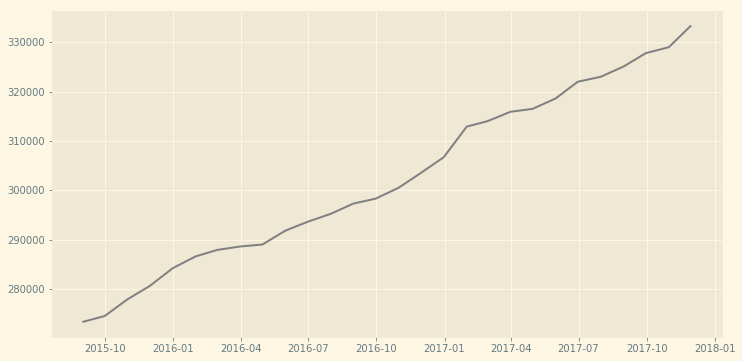

In [85]:

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[49:], train.values[49:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[49:], f.fittedvalues[49:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)
plt.title("Simple Exponential Smoothing")    
plt.legend();


In [86]:
model = Holt(np.asarray(train['Sale_Prices']))
model._index = pd.to_datetime(train.index)

In [87]:
fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(9)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(9)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(9)

In [88]:
pred1

array([275060.74460479, 276303.83399686, 277546.92338893, 278790.012781  ,
       280033.10217307, 281276.19156513, 282519.2809572 , 283762.37034927,
       285005.45974134, 286248.54913341])

In [89]:
pred2

array([277705.73592149, 279611.47184298, 281517.20776447, 283422.94368596,
       285328.67960745, 287234.41552894, 289140.15145043, 291045.88737193,
       292951.62329342, 294857.35921491])

In [90]:
pred3

array([276523.02328922, 278472.62461699, 280422.22594476, 282371.82727254,
       284321.42860031, 286271.02992808, 288220.63125586, 290170.23258363,
       292119.8339114 , 294069.43523918])

ValueError: x and y must have same first dimension, but have shapes (29,) and (10,)

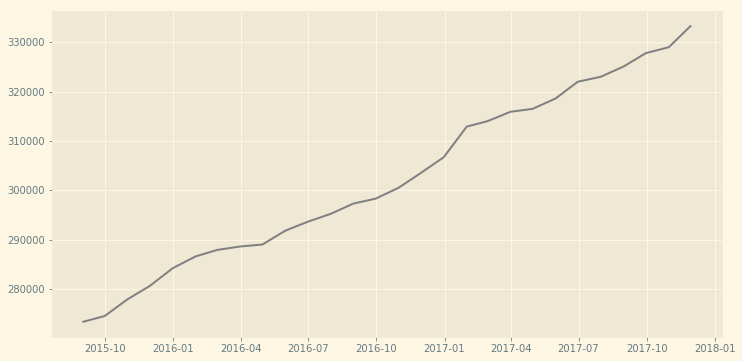

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[49:], train.values[49:])
ax.plot(test.index, test.values, color="gray")
for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[49:], f.fittedvalues[49:], color=c)
    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();
#view rawexponential_smoothing.py hosted with ❤ by GitHub